In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#data in intervals.txt
#840,157,145,44,33,121,150,280,434,736,584,887,263,1901,695,294,562,721,76,710,46,402,194,759,319,460,40,1336,335,1354,454,36,667,40,556,99,304,375,567,139,780,203,436,30,384,129,9,209,599,83,832,328,246,1617,638,937,735,38,365,92,82,220


In [53]:
with open('intervals.txt') as f:
    intervals = [int(x) for x in f.read().split(',')]

In [54]:
df = pd.DataFrame(intervals, columns=['days'])

Text(0.5, 1.0, 'A histogram of earthquake data')

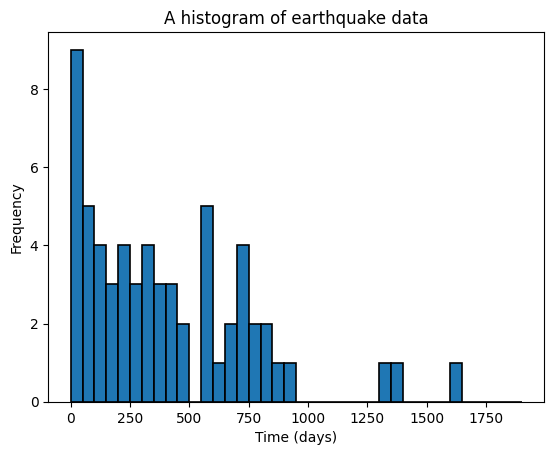

In [62]:
bins = np.arange(0, max(intervals), 50)
plt.hist(df['days'], bins=bins, edgecolor='black', linewidth=1.2)
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.title('A histogram of earthquake data')

The histogram of the earthquake data is highly right-skewed with a peak on the left and the frequencies tailing off to the right. The shape is consistent with an exponential distribution.

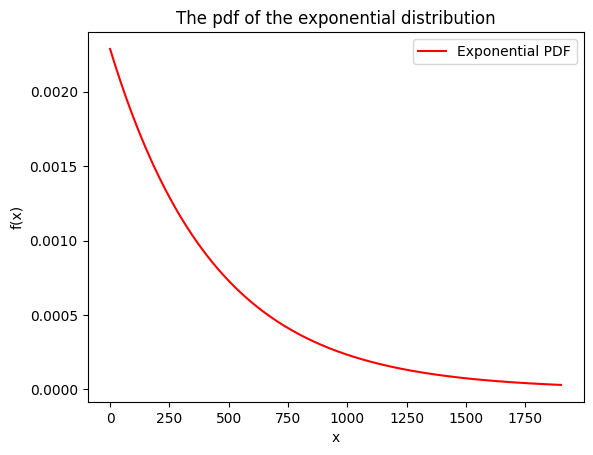

In [56]:
def exponential_pdf(x, lambda_):
    return lambda_ * np.exp(-lambda_ * x)

lambda_ = 1/df.mean()
x = np.arange(0, max(intervals))    
pdf_values = [exponential_pdf(x, lambda_) for x in x]
plt.plot(x, pdf_values, color='r', label='Exponential PDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'The pdf of the exponential distribution')
plt.legend()
plt.show()

The probability density function of the exponential distribution with parameter $\lambda$ = $\frac{1}{437}$\
The shapes of the p.d.f and histogram indicate that an exponential model may be a suitable fit for the data.

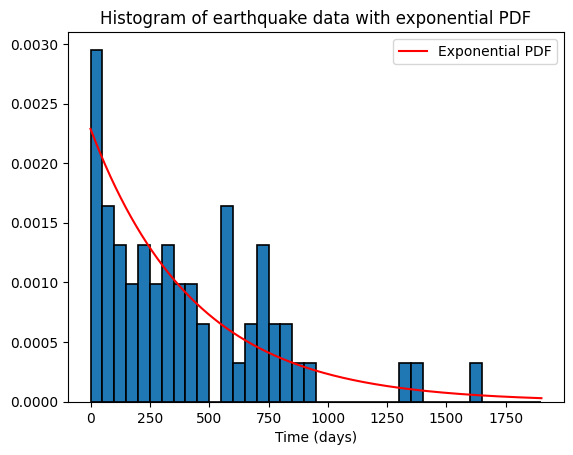

In [57]:
plt.hist(df['days'], bins=bins, edgecolor='black', linewidth=1.2, density=True)
plt.plot(x, pdf_values, color='r', label='Exponential PDF')
plt.xlabel('Time (days)')
plt.title('Histogram of earthquake data with exponential PDF')
plt.legend()    
plt.show()

In [58]:
df['cumulative'] = df['days'].cumsum()

In [59]:
df['total_earthquakes'] = df.index + 1
df.head()

,days,cumulative,total_earthquakes
0,840,840,1
1,157,997,2
2,145,1142,3
3,44,1186,4
4,33,1219,5


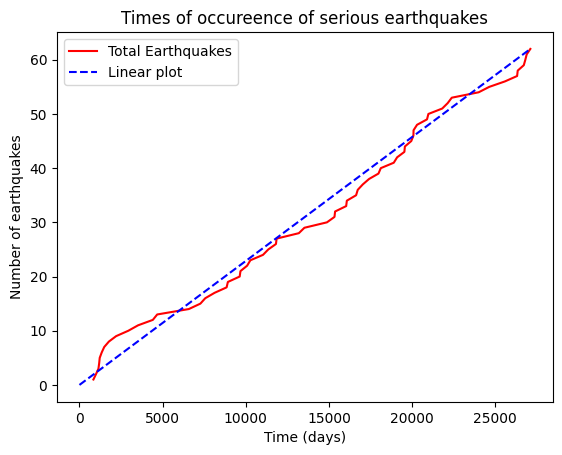

In [60]:
df.plot(x='cumulative', y='total_earthquakes', color='r', label='Total Earthquakes')
plt.plot([0,max(df['cumulative'])], [0, max(df['total_earthquakes'])], 'b--', label='Linear plot')
plt.xlabel('Time (days)')
plt.ylabel('Number of earthquakes')
plt.title('Times of occureence of serious earthquakes')
plt.legend()
plt.show()

The cumulative time plot is similar to a straight line plot through the origin, indicating that the earthquakes occur at a roughly consistent rate, indicating that a Poisson process might be a reasonable model fo the occurrences of serious earthquakes.